In [63]:
#importing packages and classes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [67]:
# we are making 200 random data points but here you can import your dataset and store in into dataframe

# make blobs will give us 2 outputs the generated samples and integer label assigned 
# So we can compare assinged lagels with labels assigned after k-means clustering
features, true_labels = make_blobs(
    n_samples=200,
   centers=3,
   cluster_std=2.75,
   random_state=42
)

# creating data frame df_features of features
df_features = pd.DataFrame(features)
print(df[:5])

# printing 1st 5 true labels
print(true_labels[:5])

           0          1
0   9.770759   3.276210
1  -9.713497  11.274518
2  -6.913306  -9.347559
3 -10.861859 -10.750635
4  -8.500380  -4.543704
[1 0 2 2 2]


In [65]:
# applying standerdization to dataset

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
print(scaled_features)

[[ 2.13082109  0.25604351]
 [-1.52698523  1.41036744]
 [-1.00130152 -1.56583175]
 [-1.74256891 -1.76832509]
 [-1.29924521 -0.87253446]
 [-0.6091802  -0.96748146]
 [-0.27382069  1.20384743]
 [-1.23815784 -1.11763029]
 [ 1.0309618   1.14757573]
 [-0.57532971 -0.95983806]
 [ 0.68905553  0.04436278]
 [ 1.28502265  0.58676985]
 [ 1.72673134  0.48622328]
 [ 0.91701946  0.10048181]
 [ 0.1220911   0.14198788]
 [-1.42295704 -1.43205314]
 [-0.21168821  1.48245342]
 [-1.41945957 -1.11301166]
 [ 1.52188347 -0.57207183]
 [-0.17617985 -1.70099461]
 [ 2.26318104  0.47775508]
 [ 0.92239799 -0.19130777]
 [-0.82837187 -1.53804066]
 [-0.13964997  0.51871042]
 [-0.64291304 -1.33286646]
 [-0.52398081  1.32693227]
 [-0.76872563  1.23327655]
 [-1.07333975 -0.97623394]
 [-0.06668397  0.3064091 ]
 [ 0.52900408 -0.45607915]
 [ 0.38320194 -0.12419681]
 [ 2.36256256 -0.67309807]
 [-1.87940407 -0.67239826]
 [-1.42115125 -1.33727943]
 [ 0.0120624   1.69458874]
 [-0.12306602  0.88434764]
 [-0.78179844 -1.4334595 ]
 

In [72]:
# initiated k-means class with following arguments

kmeans = KMeans(
   init="random",
   n_clusters=3,
   n_init=10,
   max_iter=300,
   random_state=42
)

In [73]:
# Fit standerdized dataset into kmeans class

kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [74]:
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)

# To see the alloted label for all data points 
print(kmeans.labels_)

74.57960106819854
[[ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]]
[0 1 2 2 2 2 1 2 0 2 0 0 0 0 1 2 1 2 0 2 0 0 2 1 2 1 1 2 1 0 0 0 2 2 1 1 2
 1 2 1 0 1 2 0 2 0 0 2 0 1 2 1 2 1 1 1 2 0 1 0 2 1 2 2 2 2 1 1 2 1 1 2 1 0
 0 0 0 1 0 1 1 0 2 2 2 2 2 1 0 2 0 1 1 1 0 2 1 0 0 1 2 2 1 2 1 0 2 0 0 2 0
 0 1 2 1 2 2 1 1 1 2 0 1 2 2 0 1 1 0 1 0 2 1 2 2 0 0 0 1 0 1 1 2 0 0 1 0 2
 2 0 1 2 0 2 0 2 2 1 0 0 1 0 0 2 1 0 0 1 2 0 2 1 0 2 1 0 1 1 1 0 1 0 2 2 2
 1 0 0 0 1 1 0 2 2 1 2 1 1 0 0]


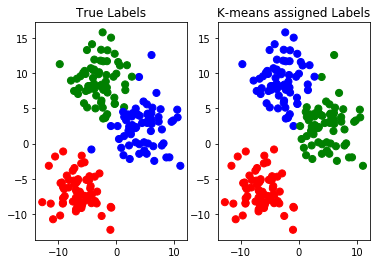

In [76]:
# Creating Color for each label (Number of clusters = number of colours)
colormap = np.array(['Green','Blue','red'])

# Creating 2 subplots for true and assigned labels
plt.subplot(1,2,1)
plt.scatter(df[0], df[1], color = colormap[true_labels], s=50)
plt. title("True Labels")


plt.subplot(1,2,2)
plt.scatter(df[0], df[1], color = colormap[kmeans.labels_], s=50)
plt. title("K-means assigned Labels")

# You can see that true lables are almost similar to the assigned labels
plt.show()